### SYRIA TELECOMMUNICATIOS PROJECT



**BUSINESS UNDERSTANDING**


SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service. 

This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.

 **Data Preparation**

1. Importing libraries

In [50]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#libraries for evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score)

from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats

#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

#=====Feature Selection =====#
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')



2. **Importing Data**


In [51]:
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


*

3. **Data Understanding**

In [52]:
#creating a function for checking information on our data
# checking data info
def info_data(data):
    missing_values= data.isnull().sum()
    missing_perce= (missing_values/len(data)*100)
    data_type = data.dtypes
    num_unique = data.nunique()
    print (f'Number of Rows,Columns {data.shape}')
    print (f'Number of Duplicated Values {data.duplicated().sum()}')


    return pd.DataFrame ({'Missing_value' : missing_values,
                          'Percent_missing_%' : missing_perce,
                          'Data_type' : data_type,
                          'Number of Unique' : num_unique}).sort_values('Percent_missing_%',ascending=False)



**Checking for outliers**

In [53]:
#creating a function for checking outliers in our data
def outlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iql=q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    outlier_list=df[column].apply(lambda x:'outlier' if x<lower or x>upper else 'not-outlier')
    print (f' outlier lower limit : {lower} \n outlier upper limit : {upper}')
    return outlier_list

**Data Inspection**

In [54]:
#checking the top 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
#checking information on our data
info_data(df)

Number of Rows,Columns (3333, 21)
Number of Duplicated Values 0


,Missing_value,Percent_missing_%,Data_type,Number of Unique
state,0,0.0,object,51
total eve calls,0,0.0,int64,123
customer service calls,0,0.0,int64,10
total intl charge,0,0.0,float64,162
total intl calls,0,0.0,int64,21
total intl minutes,0,0.0,float64,162
total night charge,0,0.0,float64,933
total night calls,0,0.0,int64,120
total night minutes,0,0.0,float64,1591
total eve charge,0,0.0,float64,1440


In [56]:
#checking for unique values
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [57]:
#printing a list of the unique values
for x in df.columns : 
    print (f'===== {x} =====')
    print (f'{df[x].unique()}')
    print()

===== state =====
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

===== account length =====
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27 

**Explanatory Data Analysis**

In [58]:
# Remove customer number feature it is contact information on the client and adds no value to the analysis
# Recheck dataframe
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
#copying our dataframe to a new dataframe
df_new=df.copy()

### Feature Types
* Continuous features are numeric values with an infinite number of possible values
* Categorical features are values that have a finite number of categories/groups
* This step seperates all of the useful features in the dataset so that they can be analyzed accordingly ahead of modeling.  

#### Continuous Features:
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes 
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

#### Categorical Features:
* state
* area code
* international plan
* voicemail plan

In [60]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

In [61]:
#checking description of  data
df[numeric_cols].describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


'Churn' and 'SeniorCitizen' are features with boolean data types. The symmetry of these two properties does not, therefore, need to be known. In light of the details in point. After this part, the 'SeniorCitizen' characteristic will be examined. Because the difference between the mean and median is less than 15%, the 'tenure' and'monthlyCharges' distributions tend to be symmetrical.
"TotalCharges" has an uneven distribution because the mean and median values diverge by a significant amount.
 


**Identifying Dependent Variable**

* The churn column will be used as our dependent variable
* Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an account. 

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

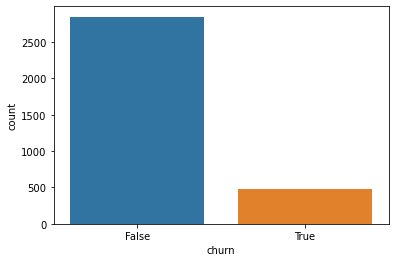

In [62]:
#checking values in the churn column
print(df_new['churn'].value_counts())
sns.countplot(data=df, x='churn')

Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.

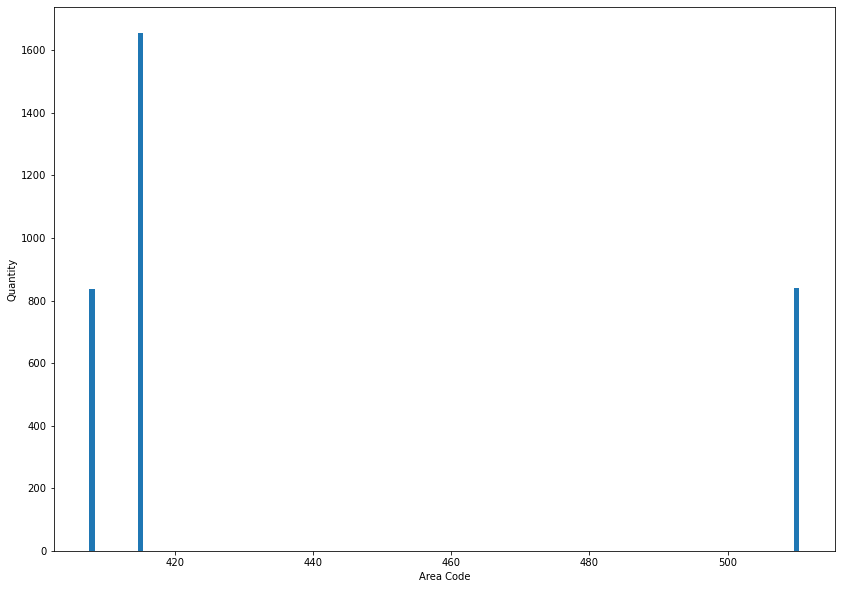

In [68]:
#Analyzing Area Code

area = df['area code'].value_counts()

transaction = area.index
quantity = area.values

# Plotting bar graph
plt.figure(figsize=(14,10))
plt.bar(transaction, quantity)
#plt.title('Distribution of Area Codes')
plt.xlabel("Area Code")
plt.ylabel("Quantity")


plt.show()

Half of the customers have the area code 415. One fourth of customers have the area code 510 and another fourth have the area code 408.

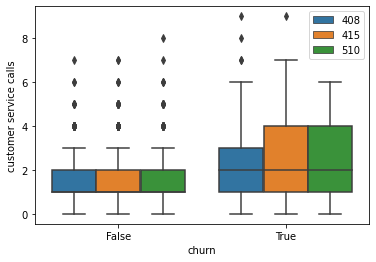

In [69]:
# Boxplot to see areas in relation to the churn column

sns.boxplot(data=df,x="churn",y="customer service calls",hue="area code")
plt.legend(loc='upper right')


**Checking the Distribution Curve of Numeric features**


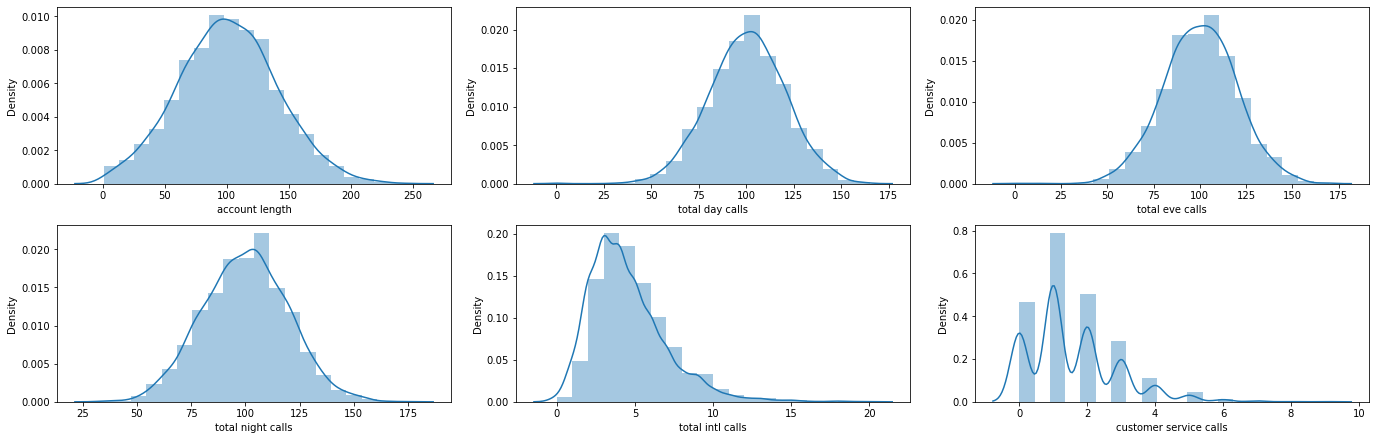

In [70]:
#plotting distribution curves
f,ax=plt.subplots (2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["account length"],bins=20,ax=ax[0,0]);

sns.distplot(df["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(df["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(df["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(df["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(df["customer service calls"],bins=20,ax=ax[1,2]);

All features seem to have a normal distribution apart from customer servoce calls, whereeas totoal international call seeto be skewed to the right but still has  normal distribution

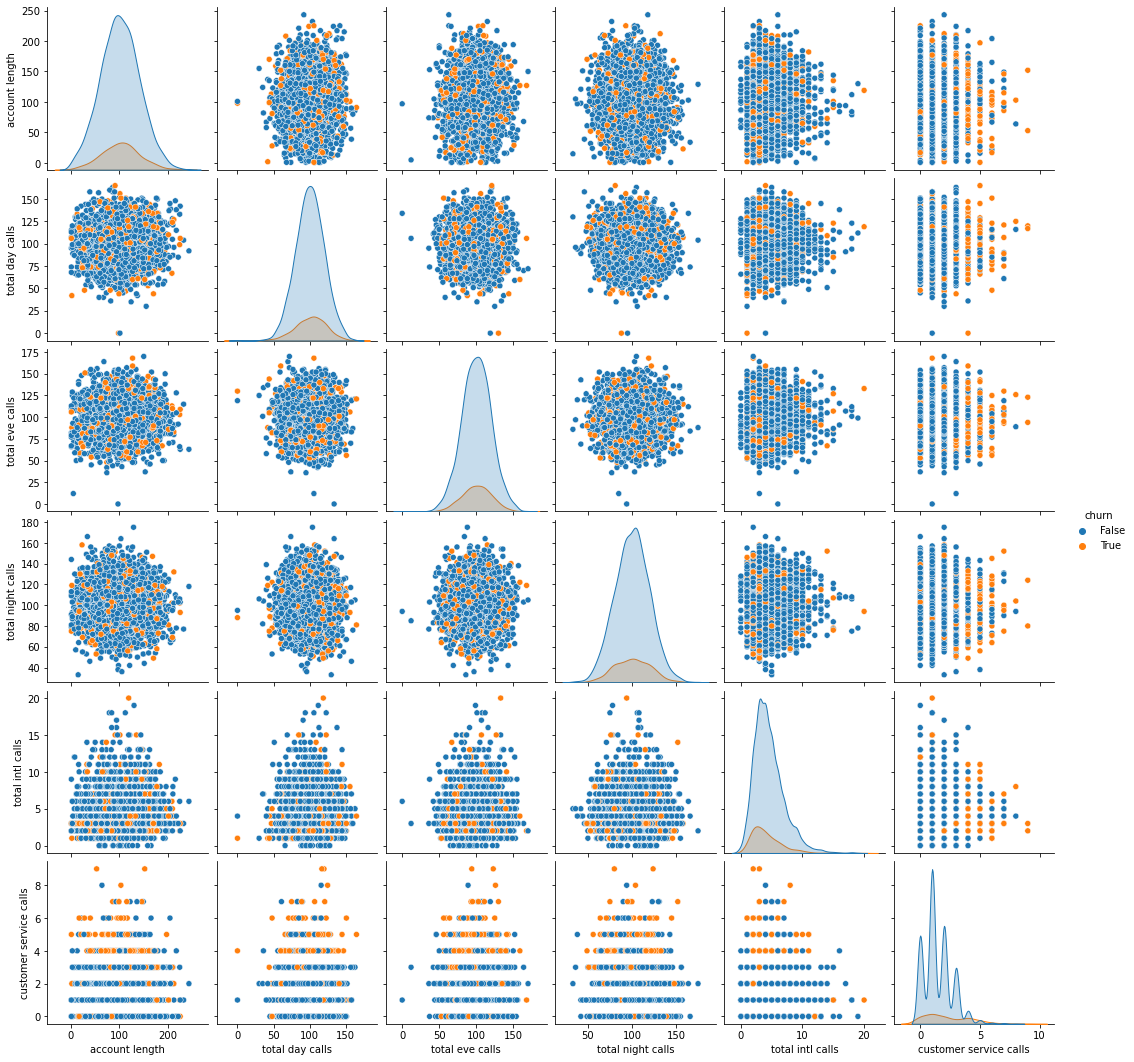

In [72]:
#pair plot for numeric feutures
data_temp = df[["account length", "total day calls", "total eve calls", "total night calls",
                "total intl calls", "customer service calls", "churn"]]

sns.pairplot(data_temp, hue="churn", height=2.5);
plt.show();

There seems to be a evident relationship between customer service calls and true churn values. After 4 calls, customers are a lot more likely to discontinue their service.

**Correlation map between the Numeric features**

<AxesSubplot:>

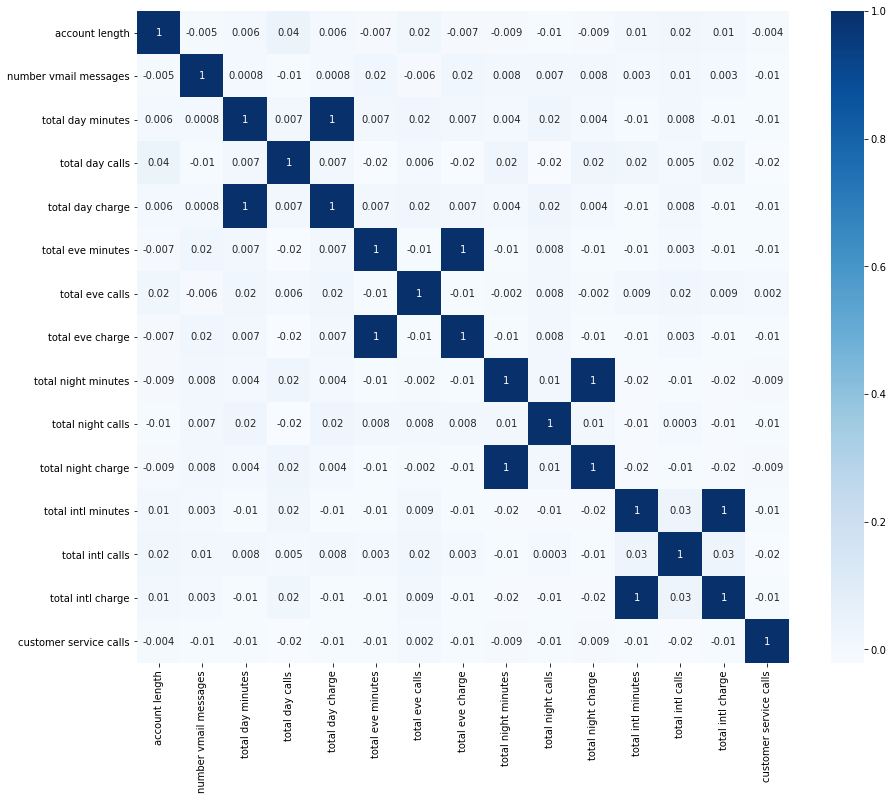

In [75]:
#Correlation matrix figure
corr_mat= df[numeric_cols].corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g')


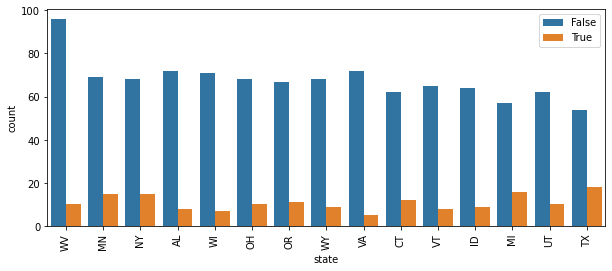

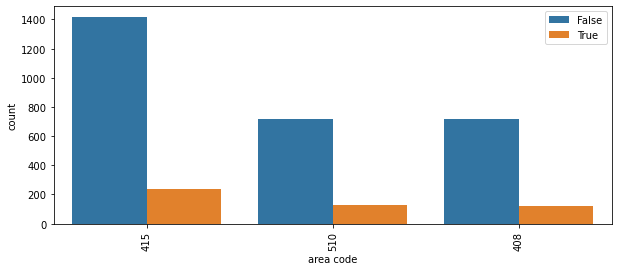

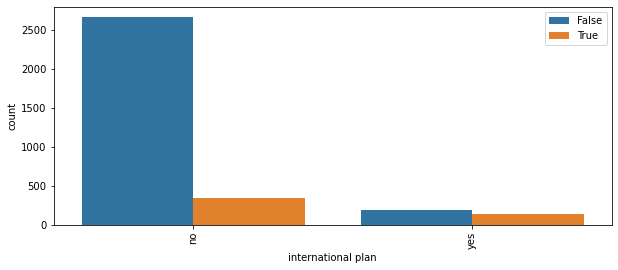

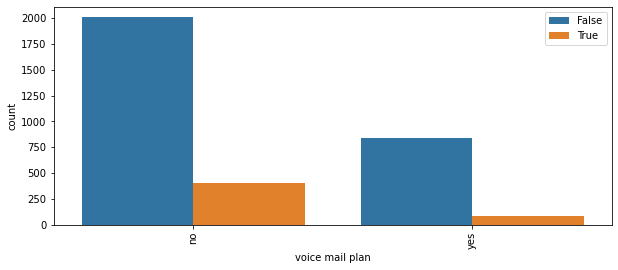

In [76]:
#categorical featurs for analysis
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

**Detecting outliers**

In [77]:


print("Before dropping numerical outliers, length of the dataframe is: ", len(df))

def drop_numerical_outliers(df, z_thresh=3):
    # Select columns with numerical data
    numeric_columns = df.select_dtypes(include=np.number)
    
    # Calculate z-scores for each numeric column
    z_scores = np.abs(stats.zscore(numeric_columns))
    
    # Create a boolean mask for rows where all z-scores are less than the threshold
    row_mask = np.all(z_scores < z_thresh, axis=1)
    
    # Drop rows that contain outliers
    df.drop(df.index[~row_mask], inplace=True)

# Call the function to drop numerical outliers
drop_numerical_outliers(df)

print("After dropping numerical outliers, length of the dataframe is: ", len(df))


Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


In [78]:


print("The original dataframe has {} columns.".format(df.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

reduced_df = df.drop(to_drop, axis=1)  # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))


The original dataframe has 20 columns.
The reduced dataframe has 16 columns.


### Transforming "Churn" Feature's Rows into 0s and 1s

In [79]:
#checking for number of values
reduced_df['churn'].value_counts()
#convertting churn columns to 0 and 1
reduced_df['churn'] = reduced_df['churn'].map({True: 1, False: 0}).astype('int') 
#checking our data frame
reduced_df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


## One Hot Encoding

Changing the categorical values to numeric values to be used in modelling

In [80]:


dummy_df_state = pd.get_dummies(reduced_df["state"], dtype=np.int64, prefix="state_is")
dummy_df_area_code = pd.get_dummies(reduced_df["area code"], dtype=np.int64, prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(reduced_df["international plan"], dtype=np.int64, prefix="international_plan_is", drop_first=True)
dummy_df_voice_mail_plan = pd.get_dummies(reduced_df["voice mail plan"], dtype=np.int64, prefix="voice_mail_plan_is", drop_first=True)

reduced_df = pd.concat([reduced_df, dummy_df_state, dummy_df_area_code, dummy_df_international_plan, dummy_df_voice_mail_plan], axis=1)
reduced_df = reduced_df.loc[:, ~reduced_df.columns.duplicated()]
reduced_df = reduced_df.drop(['state', 'area code', 'international plan', 'voice mail plan'], axis=1)

reduced_df.head()


,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,0,0,1,0,0,1
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,0,0,1,0,0,1
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,0,0,1,0,0,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,0,0,0,0,0,1,0,0,1,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,0,0,1,0,1,0


**Scaling numerical Values**

In [81]:
#using MinMaxScaler to transform our data
def scaling(columns):
    return transformer.fit_transform(reduced_df[columns].values.reshape(-1, 1))

numeric_columns = reduced_df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    reduced_df[column] = scaling(column)

reduced_df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,0.587963,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.384259,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.342593,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**Performing a Train Test Split**

In [144]:
X=reduced_df.drop(['churn'],axis=1)
y=reduced_df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)


### Applying SMOTE Technique 
 This helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


In [145]:
reduced_df.churn.value_counts()


0.0    2727
1.0     442
Name: churn, dtype: int64

In [146]:
sm = SMOTE(k_neighbors=5, random_state=123)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2376, 67)
Before OverSampling, the shape of y_train: (2376,)
After OverSampling, the shape of X_train_over: (4126, 67)
After OverSampling, the shape of y_train_over: (4126,)


In [83]:
#checking the values in y_train_over
y_train_over.value_counts()

1.0    2063
0.0    2063
Name: churn, dtype: int64

In [147]:
import plotly.express as px

#distribution of churn before smote
churn = reduced_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [148]:
y_train_over_df = y_train_over.to_frame()
churn = y_train_over_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over_df,
               values = quantity,
               names = transuction,
               hole = .5,
               title = 'Distribution of Churn - After SMOTE')
figure.show()






## Modeling

**Logistic Regression Classifier**

In [153]:
# Object creation, fitting the data & getting predictions 
lr= LogisticRegression()
lr.fit(X_train_over,y_train_over) 
y_pred = lr.predict(X_test)

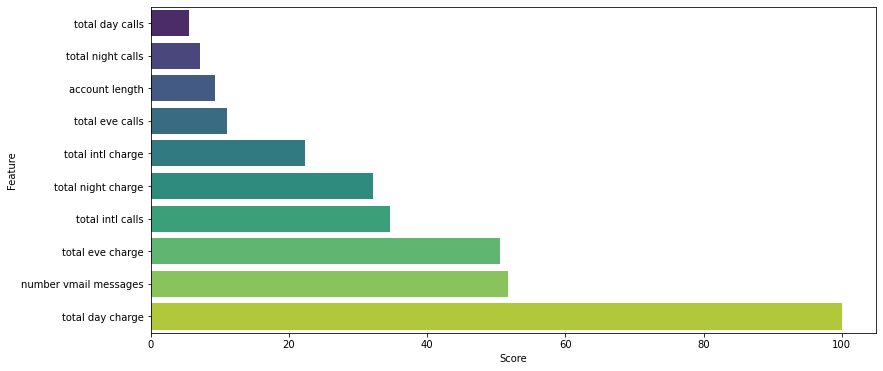

In [154]:
# Checking the important features
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]

# Sorting indices
sorted_idx = np.argsort(feature_importance)[0:10]

# Creating DataFrame for plotting
df = pd.DataFrame({'Feature': np.array(X.columns)[sorted_idx],
                   'Importance': feature_importance[sorted_idx]})

# Plotting using seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x='Importance', y='Feature', data=df, palette='viridis')
#plt.title ('Top 10 Relative Feature Importance for Logistic Regression Model', )
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.94      0.77      0.85       664
           1       0.38      0.73      0.50       129

    accuracy                           0.77       793
   macro avg       0.66      0.75      0.67       793
weighted avg       0.85      0.77      0.79       793



In [158]:
#providing classification report for the predicted values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85       664
         1.0       0.38      0.73      0.50       129

    accuracy                           0.77       793
   macro avg       0.66      0.75      0.67       793
weighted avg       0.85      0.77      0.79       793



LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS  
Accuracy score for testing set:  (1.0, 5)
F1 score for testing set:  (1.0, 5)
Recall score for testing set:  (1.0, 5)
Precision score for testing set:  (1.0, 5)


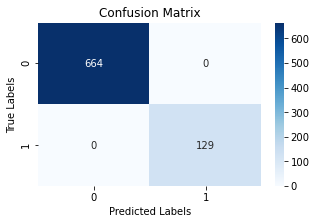

In [159]:
print("LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS  ")
print('Accuracy score for testing set: ',(accuracy_score(y_test,y_pred_lr),5))
print('F1 score for testing set: ',(f1_score(y_test,y_pred_lr),5))
print('Recall score for testing set: ',(recall_score(y_test,y_pred_lr),5))
print('Precision score for testing set: ',(precision_score(y_test,y_pred_lr),5))
cm_lr = confusion_matrix(y_test, y_pred_lr)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* The top three features in the logistic regression classifier model are total day charge, voicemail message count, and total evening charge. The model's accuracy is decent at 76.5%. With an F1 score of only 50.2%, the test will only be accurate 50% of the time. 


**RANDOM FOREST CLASSIFIER**

In [160]:
# Fitting the data and gwtting predictions
rf_model_final = RandomForestClassifier() 
rf_model_final.fit(X_train_over,y_train_over) 
y_pred_rf = rf_model_final.predict(X_test)

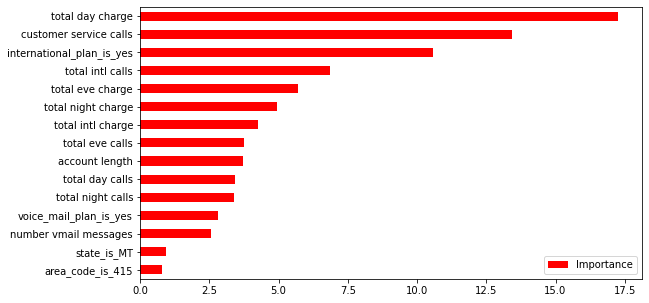

In [161]:
import matplotlib.pyplot as plt


Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))

plt.show()

In [162]:
print(classification_report(y_test, y_pred_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       664
           1       0.75      0.71      0.73       129

    accuracy                           0.91       793
   macro avg       0.85      0.83      0.84       793
weighted avg       0.91      0.91      0.91       793



RANDOM FOREST MODEL RESULTS  
Accuracy score for testing set:  0.91425
F1 score for testing set:  0.728
Recall score for testing set:  0.70543
Precision score for testing set:  0.75207


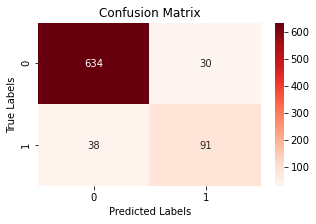

In [163]:
print("RANDOM FOREST MODEL RESULTS  ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

* The top three features in the logistic regression classifier model are total day charge, voicemail message count, and total evening charge. The model's accuracy is decent at 76.5%. With an F1 score of only 50.2%, the test will only be accurate 50% of the time. 


**Decision Tree classifier**


In [164]:
#  Fitting the data & getting predictions
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_over,y_train_over)
y_pred_dt = decision_tree.predict(X_test)

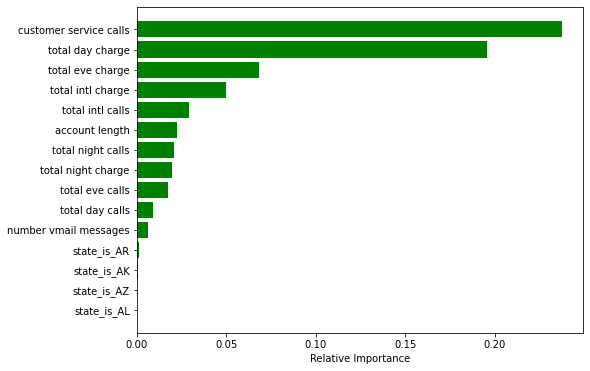

In [165]:
feature_names = list(X_train_over.columns)
importances = decision_tree.feature_importances_[0:15]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
#plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [166]:
print(classification_report(y_test, y_pred_dt, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       664
           1       0.63      0.75      0.69       129

    accuracy                           0.89       793
   macro avg       0.79      0.83      0.81       793
weighted avg       0.90      0.89      0.89       793



 DECISION TREE CLASSIFIER MODEL RESULTS 
Accuracy score for testing set:  0.88777
F1 score for testing set:  0.68551
Recall score for testing set:  0.75194
Precision score for testing set:  0.62987


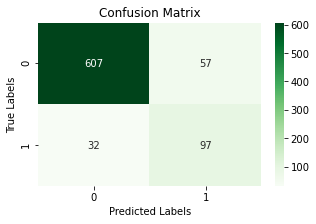

In [167]:
print(" DECISION TREE CLASSIFIER MODEL RESULTS ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_dt),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_dt),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_dt),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_dt),5))
cm_dt = confusion_matrix(y_test, y_pred_dt)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dt, annot=True, cmap='Greens', fmt='g', ax=ax)
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();

Customer service calls total day fee, total evening charge, and decision tree classifier rank as the model's top three drivers. This model's F1 score and accuracy are not as good as model 2's.
 


**Model Comparison**

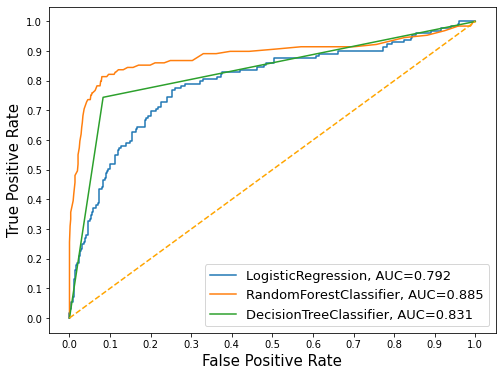

In [168]:
#using ROC curve to compare the models
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)


plt.legend(prop={'size':13}, loc='lower right')

plt.show()


* The ROC curve contrasts our classifier's true positive rate with false positive rate.
 The best models, in this case the random forest classifier, will have a curve that closely hugs the upper left corner of the graph.
 


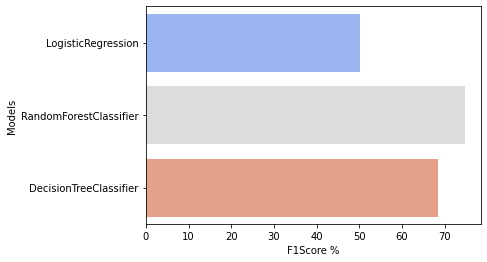

In [181]:
#using F1 Score to compare the models
models = [lr,rf_model_final,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","F1Score"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    precision = f1_score(y_test, y_pred)    
    result = pd.DataFrame([[names, precision*100]], columns= ["Models","F1Score"])
    results = results.append(result)
    
    
sns.barplot(x= 'F1Score', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1Score %');

In [182]:
results

,Models,F1Score
0,LogisticRegression,50.267380
0,RandomForestClassifier,74.708171
0,DecisionTreeClassifier,68.551237


**Model Accuracy**

''

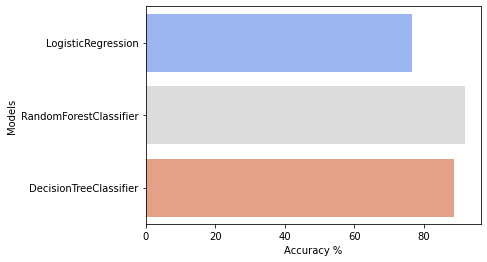

In [183]:
models = [lr,rf_model_final,decision_tree]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
;

In [184]:
results

,Models,Accuracy
0,LogisticRegression,76.544767
0,RandomForestClassifier,91.803279
0,DecisionTreeClassifier,88.776797


**Tuning Of Random Forest Classifier Using HyperParameter**

In [185]:
#using a 3 fold cross validation technique
rf_params = {"max_depth": [8,15,20],
             "n_estimators":[500,1000],
             "min_samples_split":[5,10,15],
             "criterion":['entropy','gini']}

In [186]:
from sklearn.model_selection import GridSearchCV

rf_model2 = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model2,rf_params,cv=3,n_jobs=-1,verbose=False)
rf_cv_model.fit(X_train_over,y_train_over)
print("Best parameters:"+str(rf_cv_model.best_params_))

#Best parameters:{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}

Best parameters:{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}


In [187]:
rf_model_final = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=500,criterion='entropy')
rf_model_final.fit(X_train_over,y_train_over)
y_pred_final = rf_model_final.predict(X_test)

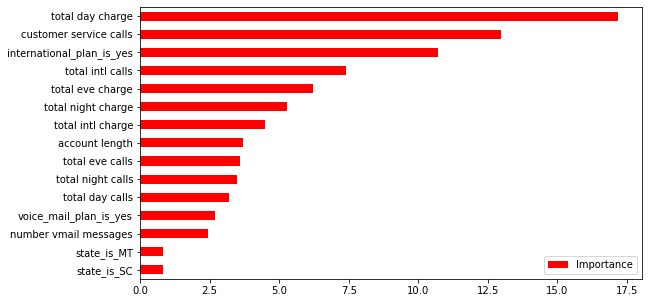

In [188]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index = X_train_over.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "r",figsize=(9, 5))
#plt.title("Feature Importance Levels");
plt.show()

In [189]:
print(classification_report(y_test, y_pred_final, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       664
           1       0.78      0.75      0.76       129

    accuracy                           0.92       793
   macro avg       0.86      0.85      0.86       793
weighted avg       0.92      0.92      0.92       793



 HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS 
Accuracy score for testing set:  0.92434
F1 score for testing set:  0.76378
Recall score for testing set:  0.75194
Precision score for testing set:  0.776


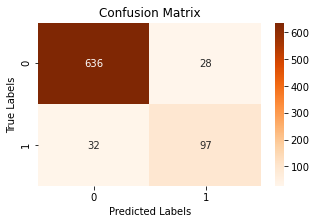

In [190]:
print(" HYPERPARAMETER TUNED RANDOM FOREST MODEL RESULTS ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_final),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_final),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_final),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_final),5))
cm_rf = confusion_matrix(y_test, y_pred_final)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_rf, annot=True, cmap='Oranges', fmt='g', ax=ax);
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
plt.show();